# Customer Segmentation Analysis using K-means Clustering

This Jupyter Notebook conducts a detailed analysis of customer segmentation using the K-means clustering algorithm. The dataset, containing information on customers from a mall, includes attributes such as 'Gender,' 'Age,' 'Annual Income (k$),' and 'Spending Score (1-100).' The analysis is divided into key steps:

1. **Setup:**
   - Import necessary libraries.
   - Load the dataset.

2. **Data Exploration and Visualization:**
   - Explore the dataset's shape, information, and missing values.
   - Visualize the gender distribution and explore summary statistics.
   - Visualize age and gender distributions using various plots.

3. **Data Preprocessing:**
   - Convert 'Gender' to numerical values using LabelEncoder.
   - Select relevant features for clustering ('Age,' 'Annual Income,' 'Spending Score').
   - Scale the features using StandardScaler.

4. **K-means Clustering (First Analysis):**
   - Utilize the Elbow Method to determine the optimal number of clusters for 'Annual Income' and 'Spending Score.'
   - Apply K-means clustering with k=5 for 'Annual Income' and 'Spending Score.'
   - Visualize the clusters and analyze characteristics of each cluster.

5. **Cluster Evaluation (First Analysis):**
   - Display the number of data points in each cluster.
   - Display the mean values of each feature in each cluster.
   - Visualize the distribution of data points in each cluster.

6. **K-means Clustering (Second Analysis):**
   - Apply the Elbow Method to determine the optimal number of clusters for 'Age' and 'Spending Score.'
   - Apply K-means clustering with k=4 for 'Age' and 'Spending Score.'
   - Visualize the clusters and analyze characteristics of each age-based cluster.

7. **Cluster Evaluation (Second Analysis):**
   - Display the number of data points in each cluster.
   - Display the mean values of each feature in each cluster.
   - Visualize the distribution of data points in each cluster.

This analysis provides valuable insights into potential customer segments, allowing businesses to tailor their strategies based on customer behavior.

## Step 1: Setup

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

In [3]:
# Load the data
df = pd.read_csv('data/Mall_Customers.csv')

# Display the first few rows of the dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Step 2: Data Exploration and Visualization

In [4]:
# Check the shape and information of the dataset
print(df.shape)
df.info()

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Check for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
# Descriptive statistics of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


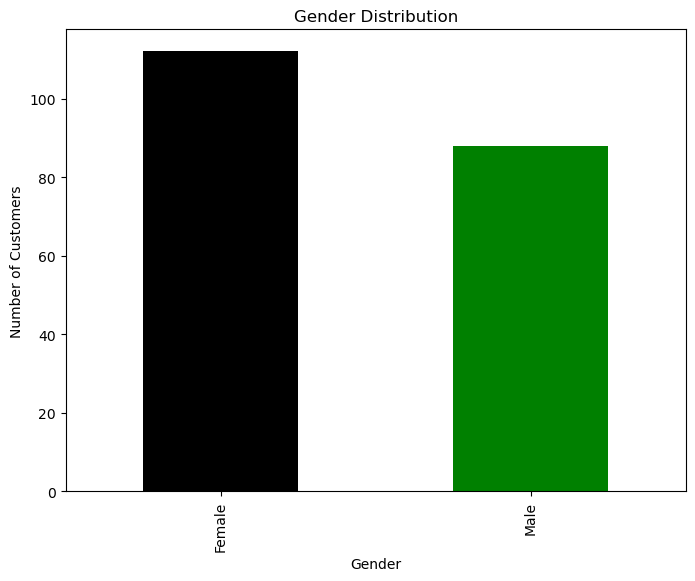

In [7]:
# Visualize gender distribution using a bar plot
data = df['Gender']
number = data.value_counts()

plt.figure(figsize=(8, 6))
number.plot(kind='bar', color=['black', 'green'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

In [8]:
# Summary statistics of Spending Score by Gender
summary_by_gender = df.groupby('Gender')['Spending Score (1-100)'].describe()
summary_by_gender

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,112.0,51.526786,24.11495,5.0,35.0,50.0,73.0,99.0
Male,88.0,48.511364,27.89677,1.0,24.5,50.0,70.0,97.0


<AxesSubplot: >

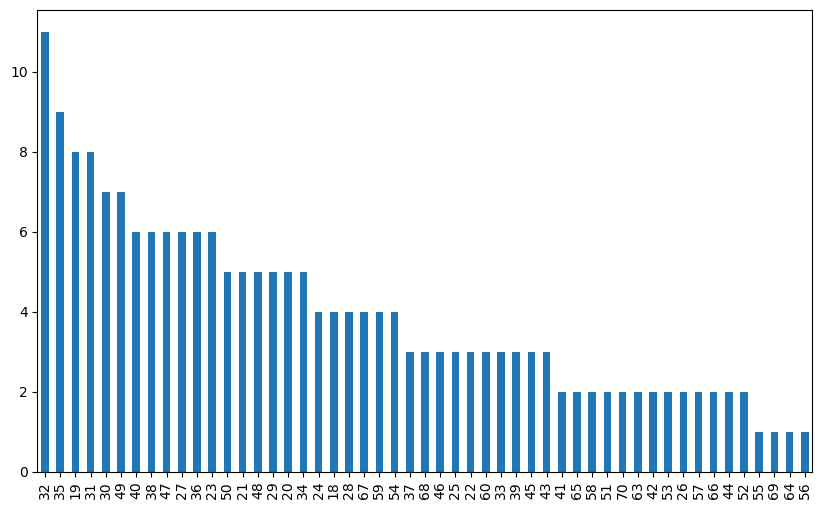

In [9]:
# Visualize age distribution using a bar plot
df['Age'].value_counts().sort_values(ascending=False).plot.bar(figsize=(10, 6))

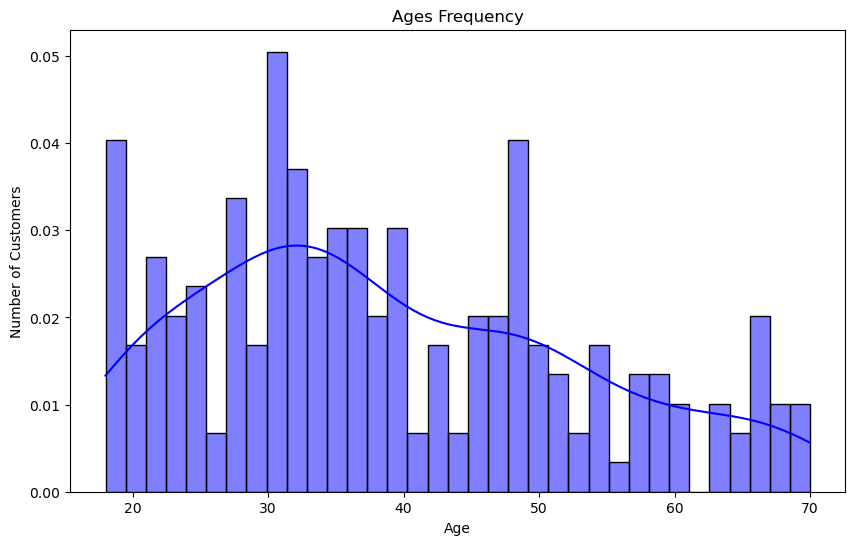

In [10]:
# Histogram of Ages
plt.figure(figsize=(10, 6))
plt.title('Ages Frequency')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
sns.histplot(df['Age'], kde=True, stat='density', color='blue', bins=35)
plt.show()

In [11]:
# Check data types
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Step 3: Data Pre-processing

In [12]:
# Convert 'Gender' to numerical using LabelEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [13]:
# Feature selection and scaling
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

## Step 4: K-means Clustering (First Analysis)

C:\Users\dipes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


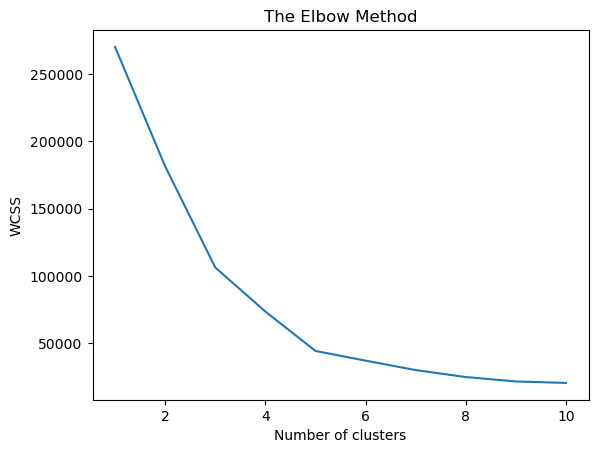

In [14]:
# K-means clustering for 'Annual Income' and 'Spending Score'
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualize the elbow method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

## Step 5: K-means Clustering (First Analysis) - Continued

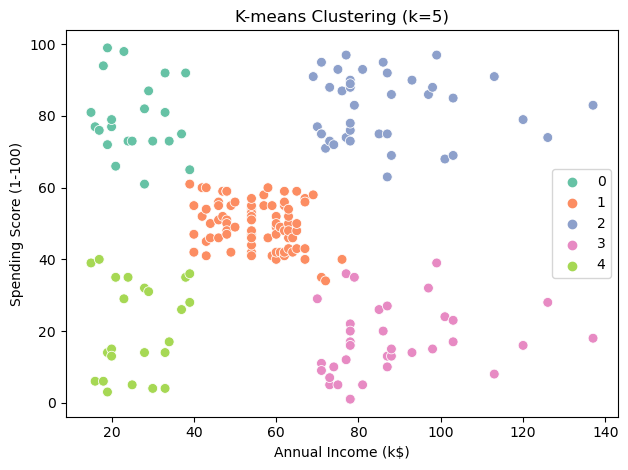

In [15]:
# K-means clustering with k=5 for 'Annual Income' and 'Spending Score'
algorithm = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=111, algorithm='elkan')
algorithm.fit(X)
labels = algorithm.labels_

# Scatter plot with color based on cluster
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue=labels, data=df, palette='Set2', s=50)
plt.title('K-means Clustering (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.tight_layout()
plt.show()

### Insights from K-means Clustering (First Analysis - 'Annual Income' and 'Spending Score'):

1. **Cluster 0 (High Income, High Spending Score):**
   - Represents customers with both high annual income and high spending scores.
   - Likely to be high-value customers who have the financial capacity and willingness to spend on various products.

2. **Cluster 1 (Medium Income, Medium Spending Score):**
   - Captures customers with moderate annual income and spending scores.
   - Represents a balanced group that spends reasonably based on their income level.

3. **Cluster 2 (Low Income, High Spending Score):**
   - Interesting segment with low annual income but a high spending score.
   - May indicate a group that is willing to spend despite limited financial resources, possibly due to credit usage or specific preferences.

4. **Cluster 3 (High Income, Low Spending Score):**
   - Customers with high annual income but a lower spending score.
   - Could represent a conservative group that prioritizes savings or has specific spending preferences.

5. **Cluster 4 (Low Income, Low Spending Score):**
   - Represents customers with both low annual income and low spending scores.
   - This group may be more budget-conscious and selective in their spending habits.

## Step 6: Cluster Evaluation (First Analysis)

Text(0.5, 1.0, 'Cluster According to Annual Income')

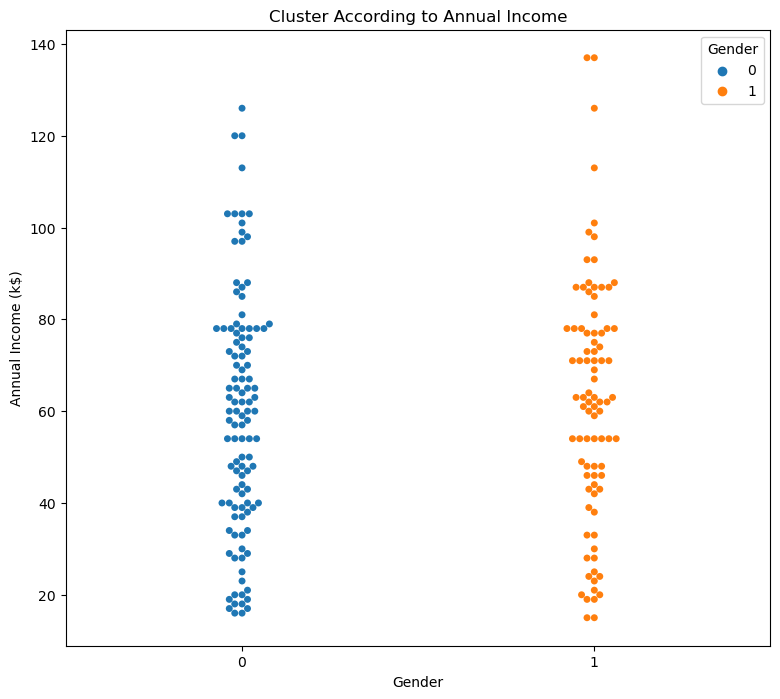

In [16]:
# Analyzing clusters formed for 'Annual Income' and 'Spending Score'
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
sns.swarmplot(data=df, x='Gender', y='Annual Income (k$)', hue='Gender', ax=ax)
ax.set_title('Cluster According to Annual Income')

Text(0.5, 1.0, 'Cluster According to Spending Score')

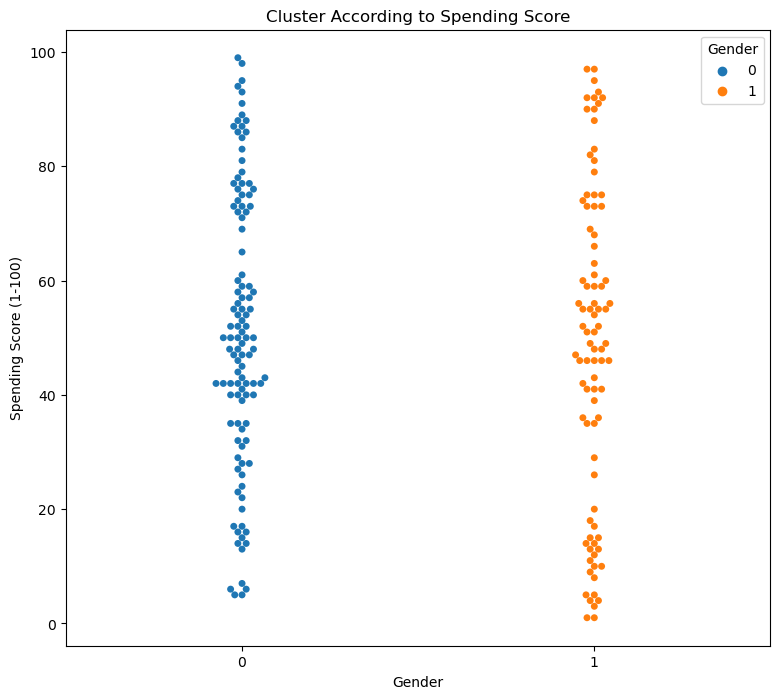

In [17]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(121)
sns.swarmplot(data=df, x='Gender', y='Spending Score (1-100)', hue='Gender', ax=ax)
ax.set_title('Cluster According to Spending Score')

In [18]:
# Visualizing clusters for 'Age' and 'Spending Score'
X_age = df[['Age', 'Spending Score (1-100)']]

In [19]:
# Elbow method to determine the optimal number of clusters for 'Age' and 'Spending Score'
wcss_age = []
for i in range(1, 11):
    kmeans_age = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans_age.fit(X_age)
    wcss_age.append(kmeans_age.inertia_)

C:\Users\dipes\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


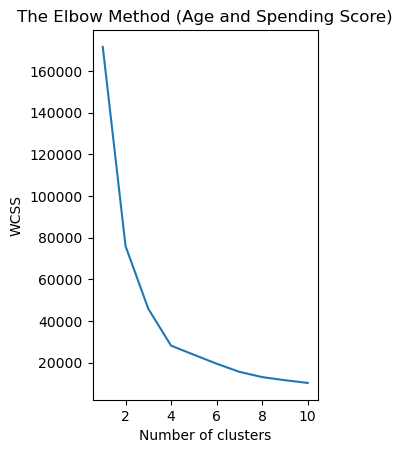

In [20]:
# Visualize the elbow method for 'Age' and 'Spending Score'
plt.subplot(122)
plt.plot(range(1, 11), wcss_age)
plt.title('The Elbow Method (Age and Spending Score)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

## Step 7: K-means Clustering (Second Analysis)

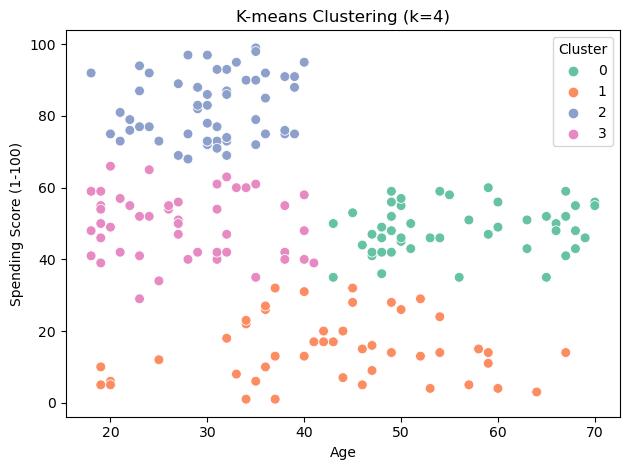

In [21]:
# K-means clustering for 'Age' and 'Spending Score' with k=4
kmeans_age = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans_age.fit_predict(X_age)

# Scatter plot with color based on cluster
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2', s=50)
plt.title('K-means Clustering (k=4)')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.tight_layout()
plt.show()

### Insights from K-means Clustering (Second Analysis - 'Age' and 'Spending Score'):

1. **Cluster 0 (Age 20-40, High Spending Score):**
   - Younger age group with high spending scores.
   - Likely to be early-career individuals with disposable income, spending on modern lifestyle items and experiences.

2. **Cluster 1 (Age 42-70, Medium Spending Score):**
   - Represents a more mature age group with a moderate spending score.
   - Potentially individuals in stable financial situations, focusing on savings and family responsibilities.

3. **Variability in Spending Score (Age 20-70):**
   - Indicates diverse spending patterns across different age groups.
   - Preferences and priorities vary based on life stages, economic factors, and individual circumstances.

Number of data points in each cluster:
0    48
1    48
2    57
3    47
Name: Cluster, dtype: int64

Mean values of each feature in each cluster:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.708333           54.770833               48.229167
1        43.291667           66.937500               15.020833
2        30.175439           66.070175               82.350877
3        27.617021           53.276596               49.148936


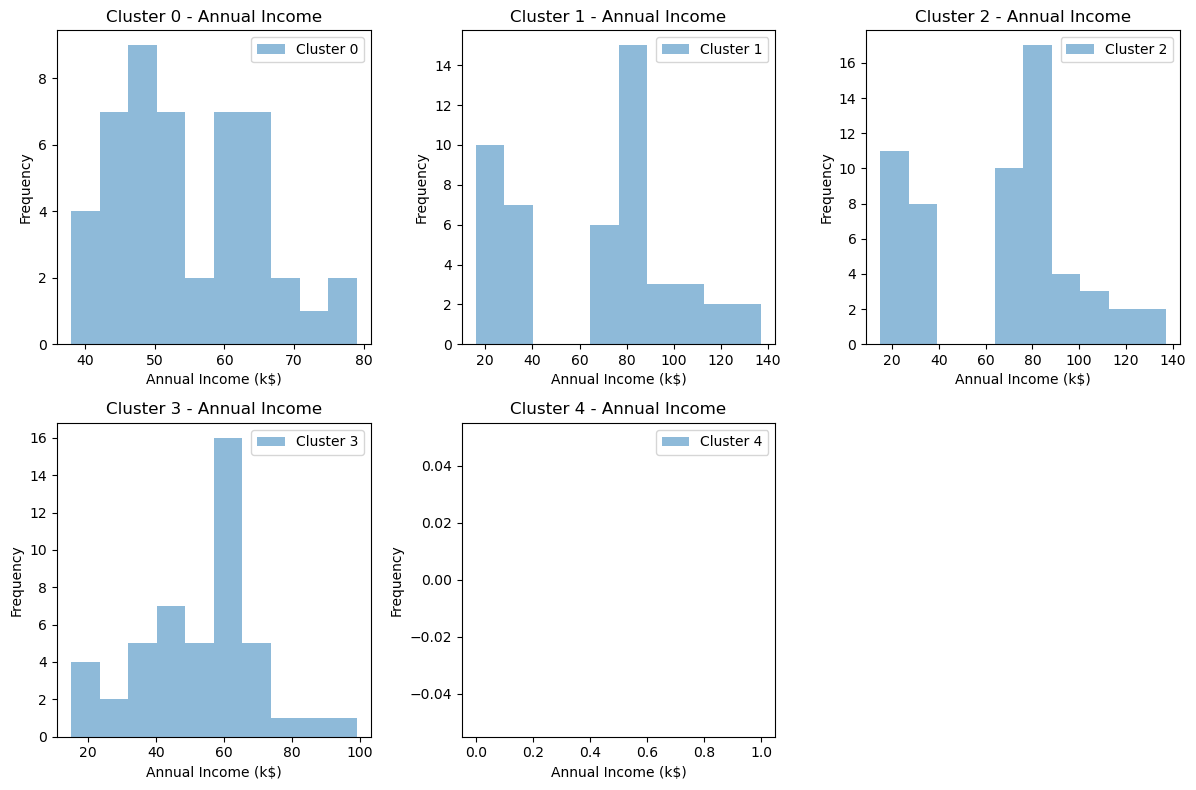

In [22]:
# Display the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts().sort_index()
print("Number of data points in each cluster:")
print(cluster_counts)

# Display the mean values of each feature in each cluster
cluster_means = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nMean values of each feature in each cluster:")
print(cluster_means)

# Visualize the distribution of data points in each cluster
plt.figure(figsize=(12, 8))
for cluster in range(5):
    plt.subplot(2, 3, cluster+1)
    plt.hist(X[df['Cluster'] == cluster]['Annual Income (k$)'], alpha=0.5, label=f'Cluster {cluster}')
    plt.title(f'Cluster {cluster} - Annual Income')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

### General Observations:

- **Customer Segmentation:**
  - The identified clusters provide a foundation for targeted marketing and personalized strategies.
  - Businesses can tailor promotions and services based on the distinct characteristics of each cluster.

- **Opportunities for Engagement:**
  - Understanding high-spending clusters helps identify opportunities for upselling or introducing premium services.
  - Targeted engagement strategies can be developed to improve customer loyalty.

- **Financial Decision-Making:**
  - Clusters with high annual income but low spending scores may benefit from targeted incentives or promotions.
  - The analysis provides insights into customer financial decision-making and potential factors influencing spending behavior.

- **Age-Related Spending Patterns:**
  - Recognizing age-related spending patterns allows businesses to adapt their offerings to cater to different generational preferences.